# MSA 2024 Phase 2 - Part 2

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os
%matplotlib inline

## 1. Load and split preprocessed data

In [2]:
#get cleaned data
PATH_ROOT = Path(os.getcwd()).parent
PATH_X = PATH_ROOT /'0. Resources'/ 'datasets' / 'X store sales' / 'sales_clean.csv'

print(f"Path: {PATH_X}")
df1 = pd.read_csv(PATH_X,index_col=0)
df1.head()
df = df1.sort_values(by='Order Date')
df = df.set_index(df['Order Date']).drop(columns=['Order Date'])
df.head()

Path: /Users/vitaliigalkin/Desktop/MSA-Phase2/data-science/0. Resources/datasets/X store sales/sales_clean.csv


,Sales,Quantity,Discount,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
Order Date,,,,,,,,,,,,,,,
2014-01-07,76.728,3,0.60,-53.7096,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2014-01-10,51.940,1,0.00,21.2954,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2014-01-11,9.940,2,0.00,3.0814,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2014-01-13,545.940,6,0.00,87.3504,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2014-01-13,333.999,3,0.15,3.9294,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

best_aic = float("inf")
best_order = None
best_model = None

# Iterate over a range of p, d, q values
for p in range(5):
    for d in range(2):
        for q in range(5):
            try:
                model = ARIMA(df['Sales'], order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except:
                continue

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')
print(best_model.summary())


Best ARIMA order: (2, 1, 4) with AIC: 31447.486390800335
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 2106
Model:                 ARIMA(2, 1, 4)   Log Likelihood              -15716.743
Date:                Sun, 28 Jul 2024   AIC                          31447.486
Time:                        04:37:11   BIC                          31487.051
Sample:                             0   HQIC                         31461.976
                               - 2106                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5600      0.002   -988.702      0.000      -1.563      -1.557
ar.L2         -0.9997      0.001  -1044.612      0.000      -1.002      -0

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 2106
Model:               SARIMAX(2, 1, 4)   Log Likelihood              -15093.009
Date:                Sun, 28 Jul 2024   AIC                          30226.018
Time:                        04:37:27   BIC                          30339.060
Sample:                             0   HQIC                         30267.417
                               - 2106                                         
Covariance Type:                  opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Quantity                    76.9351      2.397     32.100      0.000      72.238      81.633
Discount                  -388.4282     48.096     -8.076      0.000    -482.695    -294.

Text(0.5, 1.0, 'Residuals Distribution')

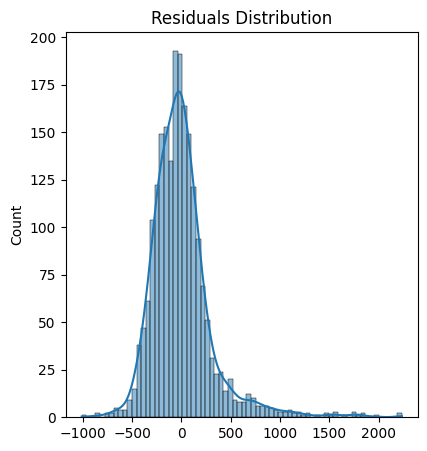

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming df is your DataFrame and 'Sales' is the target variable
# 'exog' should be a DataFrame of your chosen features
# Define exogenous variables
exog = df[['Quantity', 'Discount', 'Ship Mode_Same Day', 'Ship Mode_Second Class',
           'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office',
           'Region_East', 'Region_South', 'Region_West', 
           'Sub-Category_Chairs', 'Sub-Category_Furnishings', 'Sub-Category_Tables']]

model = SARIMAX(df['Sales'], exog=exog, order=(2, 1, 4))
model_fit = model.fit(disp=False)

# Summary of the model
print(model_fit.summary())

# Diagnostics and evaluation
residuals = model_fit.resid
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')


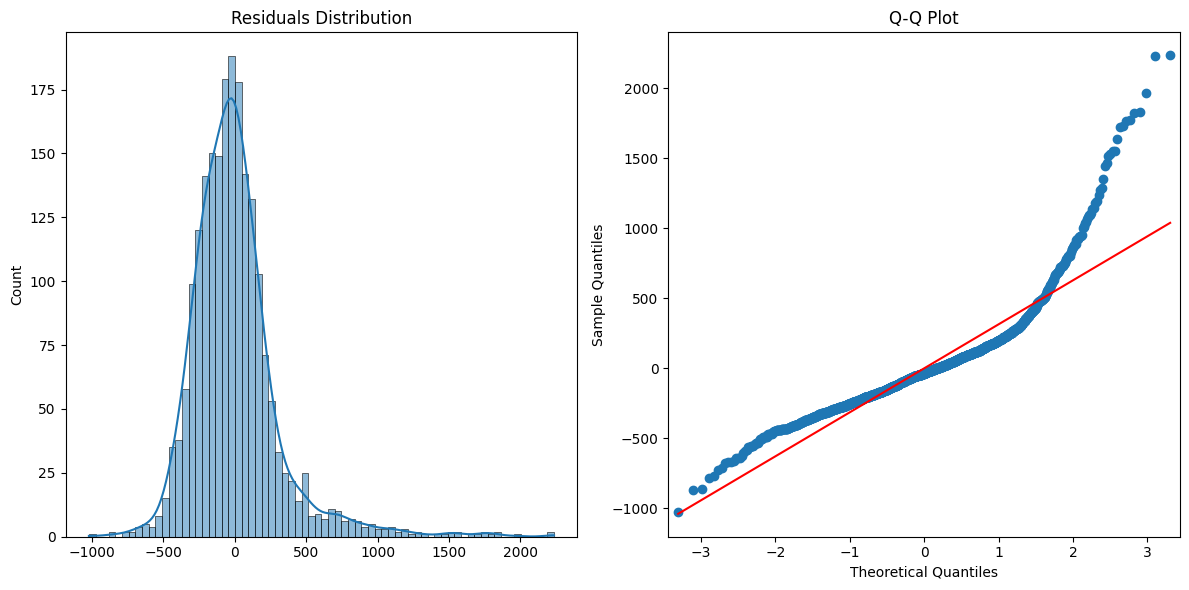

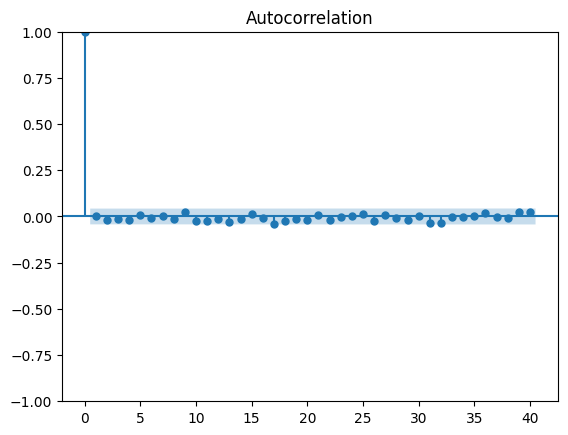

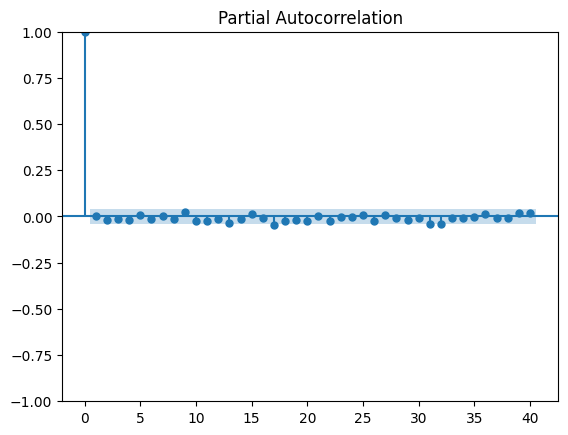

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Residual analysis
residuals = model_fit.resid

# Plotting residuals
plt.figure(figsize=(12, 6))

# Residuals distribution
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')

# Q-Q plot for normality
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Autocorrelation of residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()


### predict 4 weeks

In [277]:
# Import necessary libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd

df.index = pd.to_datetime(df.index)

# Define the training and test data
train = df[:'2017-11-30']
test = df['2017-12-01':'2017-12-31']

# Exogenous variables for training and test sets
exog_train = train[['Quantity', 'Discount', 'Profit','Ship Mode_Same Day', 'Ship Mode_Second Class',
                    'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office',
                    'Region_East', 'Region_South', 'Region_West', 
                    'Sub-Category_Chairs', 'Sub-Category_Furnishings', 'Sub-Category_Tables']]
exog_test = test[['Quantity', 'Discount','Profit', 'Ship Mode_Same Day', 'Ship Mode_Second Class',
                  'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office',
                  'Region_East', 'Region_South', 'Region_West', 
                  'Sub-Category_Chairs', 'Sub-Category_Furnishings', 'Sub-Category_Tables']]

# Confirm the size of training and test sets
print(f"Training set size: {train.shape[0]}")
print(f"Test set size: {test.shape[0]}")


Training set size: 2000
Test set size: 106


In [278]:
# Import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build and fit the model on the training set
model = SARIMAX(train['Sales'], exog=exog_train, order=(2, 1, 4))
model_fit = model.fit(disp=False)

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 2000
Model:               SARIMAX(2, 1, 4)   Log Likelihood              -14280.558
Date:                Sun, 28 Jul 2024   AIC                          28603.117
Time:                        02:26:51   BIC                          28720.725
Sample:                             0   HQIC                         28646.301
                               - 2000                                         
Covariance Type:                  opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Quantity                    79.1149      2.325     34.023      0.000      74.557      83.673
Discount                   -68.0170     65.398     -1.040      0.298    -196.195      60.

In [279]:
# Determine the start and end positions based on your data
start_position = len(train) # Or specify a specific position if known
end_position = start_position + len(test) -1

end_date = test.index.max()
print(start_position)
# Forecasting sales for the specified period
predictions = model_fit.predict(start=start_position, end=end_position, exog=exog_test, dynamic=False)

# Display predictions
print(predictions)


2000
2000     172.412630
2001     429.417103
2002     613.695064
2003     282.865653
2004     807.415201
           ...     
2101     463.702904
2102     464.106835
2103     -54.055057
2104    1087.183400
2105     451.140053
Name: predicted_mean, Length: 106, dtype: float64


In [280]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate evaluation metrics
mse = mean_squared_error(test['Sales'], predictions)
mae = mean_absolute_error(test['Sales'], predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MSE: 51786.01964405455
MAE: 173.27407178503833
RMSE: 227.56541838349372


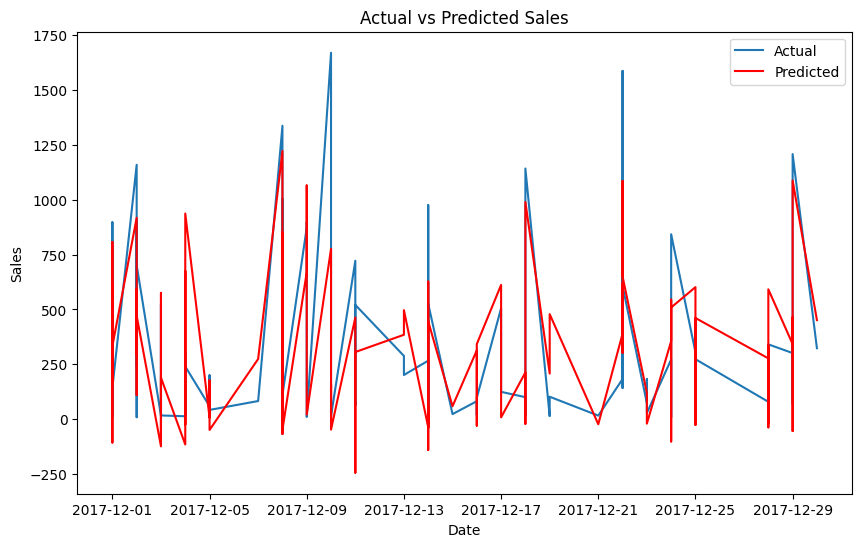

In [281]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Sales'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


## 2. Choose an algorithm

## 3. Train and test a model

In [ ]:
#

## 4. Evaluate the model 

In [ ]:
#

## 5. Summary